## Baseball stats and team performance or: How I came to love baseball data 

When I was a kid, my family spent several vacations in the USA. Sports geek that I was, I consumed as much US sports as I could. Whatever was on TV, I watched it. I had a only a vague idea of the language, didn't get every single rule or umpire decision but who cares? I liked it anyway. One thing though left me starring in true bewilderment: Baseball stats. What WERE these strange numbers? I had no clue whatsoever. 

So initially, I wasn't very enthusiastic when I had to choose the dataset for this project. Titanic? Hmmm. Baseball? Uh well, let's take baseball. But boy I was in for a surprise.

### The Question

Data from 1871 on? What the...? Salaries data for each player?? Wow. Pitching data, batting data??? There is such a wealth of data that it took me a moment to settle on one question. I mean you could try to track the statistical effects of the so called Steroid Era. Or explore the huge differences in salaries between top players and the rest, etc., etc. 

Not least because the task was to analyse at least one dependent and three independent variables, eventually I decided upon: 

**What is the relationship between On-Base Percentage (OBP), Slugging Percentage (SLG), Walks plus Hits per Inning Pitched (WHIP), Payroll ( = my explanatory variables) and team performance (= my response variable - operationalized as the percentage of games won per regular season).**

### The Variables

When trying to explain team performance there are plenty of potential explanatory stats to choose from. You can go from very basic and traditional (e.g. Batting Average) to the most advanced sabermetrics promoted by sites such as [fangraphs](http://www.fangraphs.com/). 

As a beginner I choose **OBP**, **SLG** and **WHIP** because past research (e.g. [Houser 2004](https://www.iwu.edu/economics/PPE13/houser.pdf), [Moy 2006](https://www.stat.berkeley.edu/~aldous/157/Old_Projects/moy.pdf)) suggested that these metrics were important and/or because they could be calculated easily from Lahman's database. I decided to also include **Payroll**. Just tipping the toes into the data revealed that some teams have huge payrolls while many teams have only small ones. It seemed reasonable that this would have an effect on how well a team performs. Usually you would expect a richer team to be able to afford better (= more expensive) players and thus winning more of their games.

### The Data 

The files relevant for my question are:

* Teams.csv
* Batting.csv
* Pitching.csv
* Salaries.csv

Let's get them in shape and calculate the variables!

#### 1. Reponse Variable: Winning Percentage

In [32]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Starting point is the teams data 
#Create a master dataframe for the analysis named master_df

master_df = pd.read_csv('baseballdatabank-master/core/Teams.csv')
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
yearID            2805 non-null int64
lgID              2755 non-null object
teamID            2805 non-null object
franchID          2805 non-null object
divID             1288 non-null object
Rank              2805 non-null int64
G                 2805 non-null int64
Ghome             2406 non-null float64
W                 2805 non-null int64
L                 2805 non-null int64
DivWin            1260 non-null object
WCWin             624 non-null object
LgWin             2777 non-null object
WSWin             2448 non-null object
R                 2805 non-null int64
AB                2805 non-null int64
H                 2805 non-null int64
2B                2805 non-null int64
3B                2805 non-null int64
HR                2805 non-null int64
BB                2805 non-null int64
SO                2685 non-null float64
SB                2661 non-null float64
CS    

In [4]:
#Choose a subset of the teams data (year >= 1985) - salaries data starts at 1985!

master_df = master_df[master_df['yearID'] >= 1985]
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 1917 to 2804
Data columns (total 48 columns):
yearID            888 non-null int64
lgID              888 non-null object
teamID            888 non-null object
franchID          888 non-null object
divID             888 non-null object
Rank              888 non-null int64
G                 888 non-null int64
Ghome             888 non-null float64
W                 888 non-null int64
L                 888 non-null int64
DivWin            860 non-null object
WCWin             624 non-null object
LgWin             860 non-null object
WSWin             860 non-null object
R                 888 non-null int64
AB                888 non-null int64
H                 888 non-null int64
2B                888 non-null int64
3B                888 non-null int64
HR                888 non-null int64
BB                888 non-null int64
SO                888 non-null float64
SB                888 non-null float64
CS                888 non-

In [5]:
#Calculate the response variable
from decimal import *

def roundDecimals(column, i):
    return column.apply(lambda x: float(round(Decimal(x), i)))
    
master_df["winning_percentage"] = (master_df['W'] / master_df['G'])
master_df['winning_percentage'] = roundDecimals(master_df['winning_percentage'], 3) 
master_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,winning_percentage
1917,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,0.97,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105,106,ATL,ATL,ATL,0.407
1918,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,0.98,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL,0.516
1919,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,0.97,Boston Red Sox,Fenway Park II,1786633.0,104,104,BOS,BOS,BOS,0.497
1920,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,0.98,California Angels,Anaheim Stadium,2567427.0,100,100,CAL,CAL,CAL,0.556
1921,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,0.98,Chicago White Sox,Comiskey Park,1669888.0,104,104,CHW,CHA,CHA,0.521


In [6]:
#For convenience, reset the index to standard integer index
master_df = master_df.reset_index(drop=True)
master_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,winning_percentage
0,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,0.97,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105,106,ATL,ATL,ATL,0.407
1,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,0.98,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL,0.516
2,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,0.97,Boston Red Sox,Fenway Park II,1786633.0,104,104,BOS,BOS,BOS,0.497
3,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,0.98,California Angels,Anaheim Stadium,2567427.0,100,100,CAL,CAL,CAL,0.556
4,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,0.98,Chicago White Sox,Comiskey Park,1669888.0,104,104,CHW,CHA,CHA,0.521


#### 2. On-Base Percentage

"On-Base Percentage (OBP) measures the most important thing a batter can do at the plate: not make an out. Since a team only gets 27 outs per game, making outs at a high rate isn’t a good thing — that is, if a team wants to win. Players with high on-base percentages avoid making outs and reach base at a high rate, prolonging games and giving their team more opportunities to score [(Source: fangraphs.com)](http://www.fangraphs.com/library/offense/obp/)."

In [7]:
#The formula for OBP is relatively simple and could be easily calculated by using existing metrics in our dataframe.
master_df['OBP'] = (master_df['H'] + master_df['BB'] + master_df['HBP'])/(master_df['AB'] + master_df['BB'] + master_df['HBP'] + master_df['SF'] )
print(master_df.info())
#But looking at master_df.info() we see that we only have got 480 values for "HBP" and "SF" and thus for "OBP" too - 408 are missing. What's going on?

HBP_and_SF_missing = master_df[(master_df['HBP'].isnull()) | (master_df['SF'].isnull())]['yearID']
HBP_and_SF_missing.size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 50 columns):
yearID                888 non-null int64
lgID                  888 non-null object
teamID                888 non-null object
franchID              888 non-null object
divID                 888 non-null object
Rank                  888 non-null int64
G                     888 non-null int64
Ghome                 888 non-null float64
W                     888 non-null int64
L                     888 non-null int64
DivWin                860 non-null object
WCWin                 624 non-null object
LgWin                 860 non-null object
WSWin                 860 non-null object
R                     888 non-null int64
AB                    888 non-null int64
H                     888 non-null int64
2B                    888 non-null int64
3B                    888 non-null int64
HR                    888 non-null int64
BB                    888 non-null int64
SO                    88

408

In [8]:
print(set(HBP_and_SF_missing)) 

{1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999}


In [9]:
#From 1985 to 1992 the MLB had 26 teams, from 1993 to 1997 28 teams, and from 1998 on 30 teams. So that's 8*26 + 5*28 + 2*30 which is 408.
#Hmm, okay all "HBP" and "SF" values for years 1985 to 1999 are missing.
#Batting.csv to the rescue! Batting.csv offers individual batting stats. We will use that to fill in our missing values
batting = pd.read_csv('baseballdatabank-master/core/Batting.csv')

#Values for 1985 to 1999
batting = batting[(batting['yearID'] >= 1985) & (batting['yearID'] < 2000 )]

In [10]:
#Group by team and year 
batting_totals = batting.groupby(['teamID', 'yearID']).sum()
len(batting_totals)

408

In [11]:
#408, check. Apply the formula for On-Base Percentage

batting_totals['OBP'] = (batting_totals['H'] + batting_totals['BB'] + batting_totals['HBP'])/(batting_totals['AB'] + batting_totals['BB'] + batting_totals['HBP'] + batting_totals['SF'] )

In [12]:
#Delete 'G' and 'stint' column as they are of no value

batting_totals.drop(['G', 'stint'], 1, inplace=True)

In [13]:
#Reshape the dataframe to easily merge with master_df

batting_totals = batting_totals.reset_index()
batting_totals.sort_values(['yearID', 'teamID'], inplace=True)
batting_totals= batting_totals.reset_index(drop=True)

In [14]:
#Merge 
master_df = master_df.combine_first(batting_totals)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 887
Data columns (total 54 columns):
2B                    888 non-null int64
3B                    888 non-null int64
AB                    888 non-null int64
BB                    888 non-null int64
BBA                   888 non-null int64
BPF                   888 non-null int64
CG                    888 non-null int64
CS                    888 non-null float64
DP                    888 non-null float64
DivWin                860 non-null object
E                     888 non-null int64
ER                    888 non-null int64
ERA                   888 non-null float64
FP                    888 non-null float64
G                     888 non-null int64
GIDP                  408 non-null float64
Ghome                 888 non-null float64
H                     888 non-null int64
HA                    888 non-null int64
HBP                   888 non-null float64
HR                    888 non-null int64
HRA                

In [15]:
#And finally round to third digit
master_df['OBP'] = roundDecimals(master_df['OBP'], 3)
#Done

#### 3. Slugging Percentage

"Slugging percentage represents the total number of bases a player records per at-bat. Unlike on-base percentage, slugging percentage deals only with hits and does not include walks and hit-by-pitches in its equation.

Slugging percentage exists mainly as a response to a noticeable flaw in batting average: Not all hits are created equal. In batting average, a single and a home run are valued the same. But in slugging percentage, home runs are counted four times as much as each single.[(Source: mlb.com)](http://m.mlb.com/glossary/standard-stats/slugging-percentage)."

In [16]:
#SLG is easy. The formula is: SLG = (H + 2B + 3B * 2 + HR * 3)/AB
master_df['SLG'] = (master_df['H'] + master_df['2B'] + master_df['3B'] * 2 + master_df['HR'] * 3) / master_df['AB']

#Round to third digit
master_df['SLG'] = roundDecimals(master_df['SLG'], 3)
#Done

#### 4. WHIP

"WHIP is one of the most commonly used statistics for evaluating a pitcher's performance. The statistic shows how well a pitcher has kept runners off the basepaths, one of his main goals. The formula is simple enough -- it's the sum of a pitcher's walks and hits, divided by his total innings pitched [(Source: mlb.com)](http://m.mlb.com/glossary/standard-stats/walks-and-hits-per-inning-pitched)."

In [17]:
#Also straigthforward: WHIP = BBA + HA / IP
master_df['WHIP'] = (master_df['BBA'] + master_df['HA'])/(master_df['IPouts'] / 3) #We get innings pitched by dividing IPouts (Innings pitched outs) by 3
master_df.head()

#Round to third digit
master_df['WHIP'] = roundDecimals(master_df['WHIP'], 3)
#Done

#### 5. Payroll

In [18]:
#Salaries.csv contains individual salary data from 1985 on
salaries = pd.read_csv('baseballdatabank-master/core/Salaries.csv')
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25575 entries, 0 to 25574
Data columns (total 5 columns):
yearID      25575 non-null int64
teamID      25575 non-null object
lgID        25575 non-null object
playerID    25575 non-null object
salary      25575 non-null int64
dtypes: int64(2), object(3)
memory usage: 999.1+ KB


In [19]:
#To get the payroll of each team we simply sum up the individual salaries for each season
payroll = salaries.groupby(['teamID', 'yearID']).sum()
payroll.head(10)

salary
teamID yearID           
ANA    1997     31135472
       1998     41281000
       1999     55388166
       2000     51464167
       2001     47535167
       2002     61721667
       2003     79031667
       2004    100534667
ARI    1998     32347000
       1999     68703999

In [20]:
#Looks good. Join with master_df
master_df = master_df.join(payroll, on=['teamID', 'yearID'])

#Rename the column
master_df.rename(columns={'salary':'payroll'}, inplace=True)

In [21]:
#Done? No, wait. Obviously winning 60% of your games with a payroll of 10 Million Dollar meant something totally different in 1985 than in 2015
#To get comparable data I choose to normalize the data using an approach I found here: http://stats.stackexchange.com/questions/70801/how-to-normalize-data-to-0-1-range

#To normalize the data first create a empty column...
master_df['norm_payroll'] = pd.Series()

#... and then fill it with the normalized value for each season

grouped = master_df.groupby('yearID')

for name, group in grouped:
    master_df['norm_payroll'].update((group['payroll'] - group['payroll'].min())/(group['payroll'].max() - group['payroll'].min()))

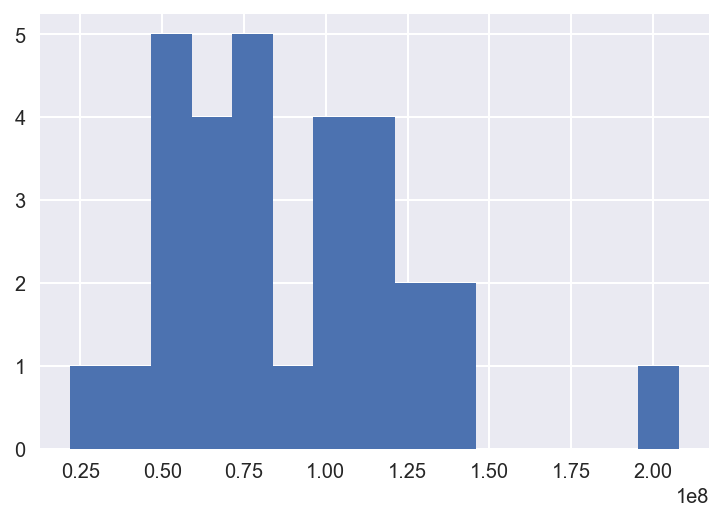

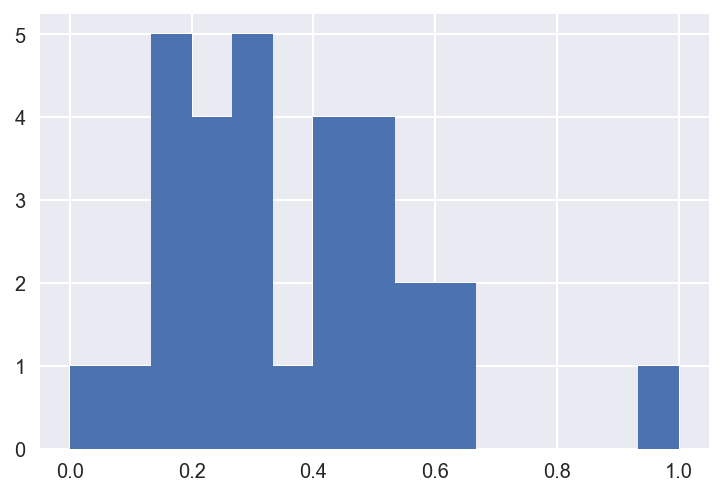

In [22]:
#Make sure this worked. Test on 2008 data
plt.hist(master_df[master_df['yearID'] == 2008]['payroll'], bins=15)
plt.show()
plt.hist(master_df[master_df['yearID'] == 2008]['norm_payroll'], bins=15)
plt.show()

In [23]:
#Neat. :)

### The Analysis

#### 1. Bivariate Analysis

Ok. Data is in shape, variables calculated. Now let's get to the analysis.

First I look at the correlation between each single variable and winning percentage.

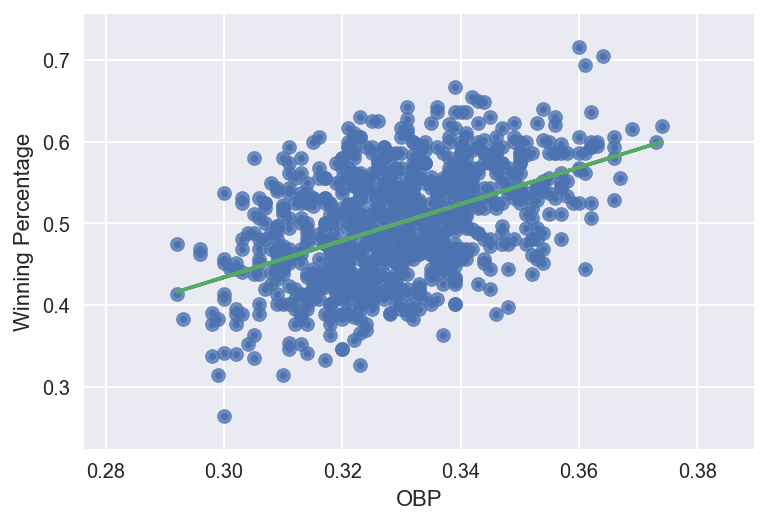

r = 0.474549593721


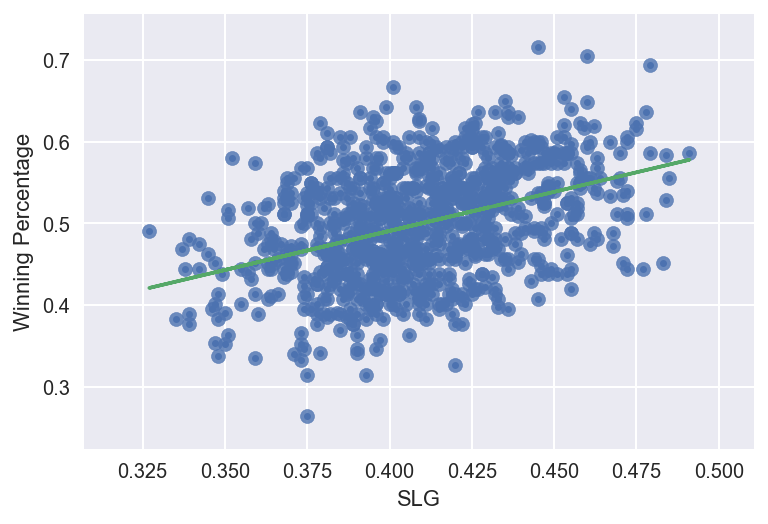

r = 0.404165355135


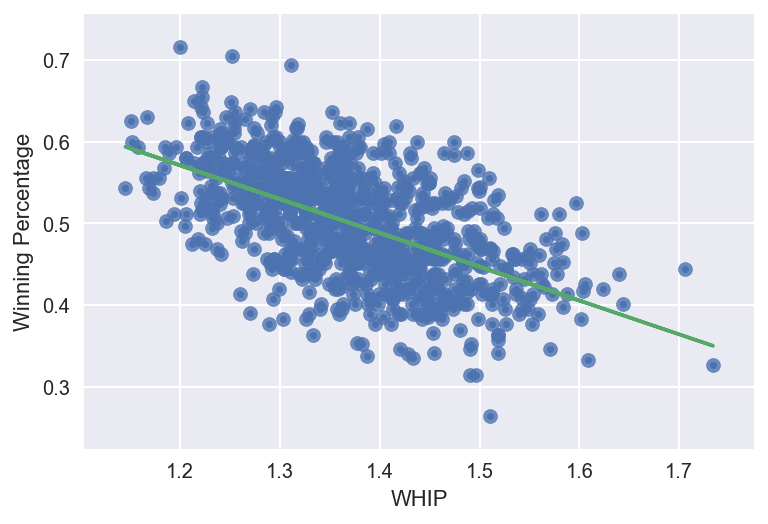

r = -0.570842307576


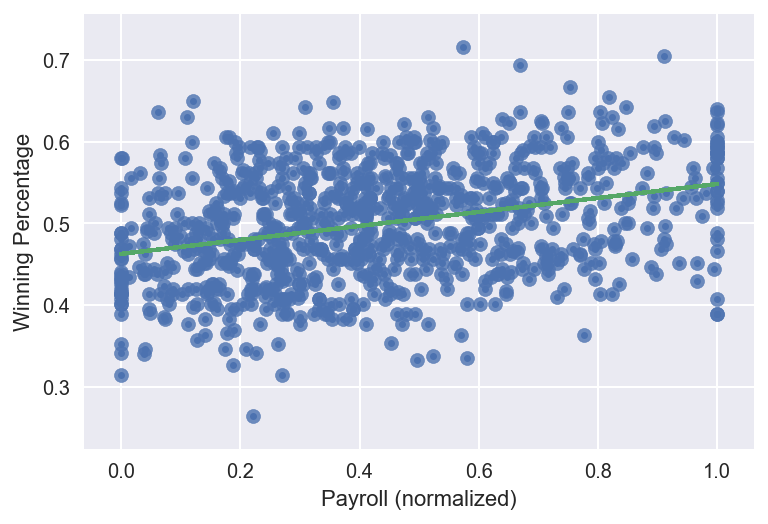

r = 0.324329304425


In [24]:
# Write a function to plot a scatterplot, add a best fit line and print out Pearson's r 

def scatter_plot(df, expl_v, resp_v, xlabel):
    plt.scatter(expl_v, resp_v, alpha=0.8)
    m, b = np.polyfit(expl_v, resp_v, 1)
    plt.plot(expl_v, resp_v, '.')
    plt.plot(expl_v, m*expl_v + b, '-')
    plt.xlabel(xlabel)
    plt.ylabel('Winning Percentage')
    plt.show()
    print("r = " + str(resp_v.corr(expl_v)))
    
scatter_plot(master_df, master_df['OBP'], master_df['winning_percentage'], 'OBP')
scatter_plot(master_df, master_df['SLG'], master_df['winning_percentage'], 'SLG')
scatter_plot(master_df, master_df['WHIP'], master_df['winning_percentage'], 'WHIP')
scatter_plot(master_df, master_df['norm_payroll'], master_df['winning_percentage'], 'Payroll (normalized)')

OBP and SLG are positively correlated with winning percentage (strength of association: medium), WHIP is negatively correlated (strength of association: high).

Contrary to my expectations payroll is only mildy associated with winning games. Hmmm, strange. Having the highest payroll obviously not guarantees a high winning percentage at all. Some top teams managed only to win around 40 to 45% of their games. The other way around some lower level teams achieved pretty high winning percentages.

Let's dig a bit deeper. 

#### 2. A quick Excursus on Payroll

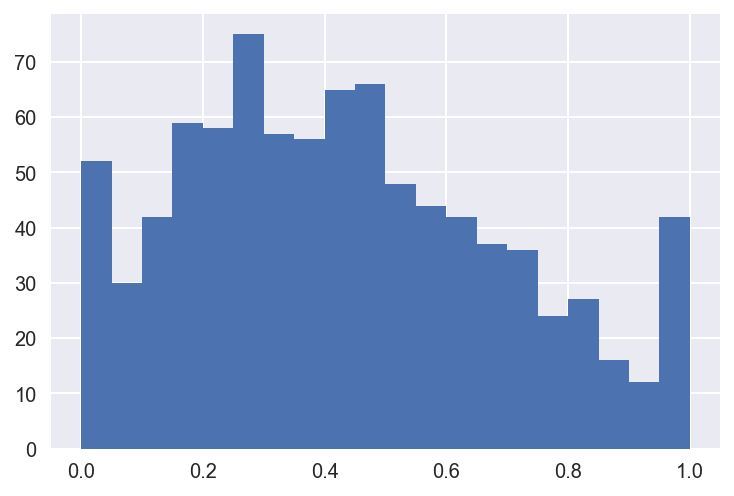

In [25]:
#Plot a distribution of all the normalized payroll data
plt.hist(master_df['norm_payroll'], bins=20)
plt.show()

The histogram shows many teams on the lowest and many at the highest end of the spectrum.

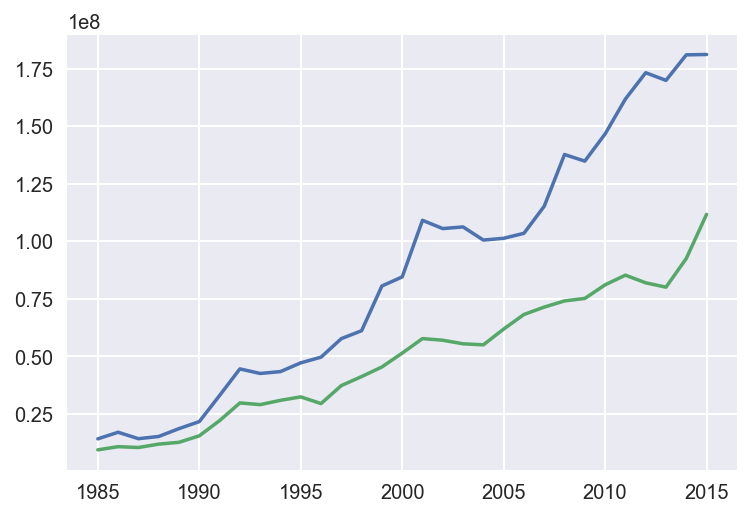

In [26]:
top5 = master_df.groupby('yearID')['payroll'].nlargest(5)
rest = master_df.drop(top5.index.levels[1]).groupby('yearID')['payroll']

plt.plot(top5.groupby(level = 'yearID').median().index, top5.groupby(level = 'yearID').median().values, rest.median().index, rest.median().values)
plt.show()

Wow. The gap between the rich teams and the have-nots has significantly widened over the course of the last three decades. 

In [27]:
max2015 = master_df[master_df['yearID'] == 2015]['payroll'].argmax()
min2015 = master_df[master_df['yearID'] == 2015]['payroll'].argmin()

print(master_df.loc[max2015]['name'], master_df.loc[max2015]['payroll'], master_df.loc[min2015]['name'], master_df.loc[min2015]['payroll']) 

Los Angeles Dodgers 215792000 Arizona Diamondbacks 61834000


In 2015 the Los Angeles Dodgers sported a payroll of ~216 Million Dollars, while the Arizon Diamondbacks spent only ~62 Million. This whole payroll topic would definitely be worth looking into - one could ask if the association differs between decades or [if the "luxury tax" implemented in 2003 had any effect](https://courses.cs.washington.edu/courses/cse140/13wi/projects/mirae-report.pdf). 

But, ladies and gentleman, we have a question to answer: 

**What is the relationship between On-Base Percentage (OBP), Slugging Percentage (SLG), Walks plus Hits per Inning Pitched (WHIP), Payroll and team performance (operationalized as the percentage of games won per regular season).**

#### 3. Multiple regression // Findings

In [28]:
#And now the time has come to do so.
#To add some statistical rigor I tried to run a Ordinary Least Squares (OLS) Regression test.

#First we need the StatsModels module.
import statsmodels.api as sm
import statsmodels.formula.api as smf

result = smf.ols(formula='winning_percentage ~ OBP + SLG + WHIP + norm_payroll ', data=master_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     winning_percentage   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     776.4
Date:                Mon, 20 Feb 2017   Prob (F-statistic):          2.64e-287
Time:                        23:23:57   Log-Likelihood:                 1786.9
No. Observations:                 888   AIC:                            -3564.
Df Residuals:                     883   BIC:                            -3540.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.2923      0.028     10.562   

Yeah, yeah, I know there's more to multiple regression (e.g. I had to verify the fit by checking the residual plots). As the statistical analysis isn't the key aspect of this exercise I just stop here.

The p-value for each variable tests the null hypothesis that the coefficient is equal to zero (the variable has no effect on the response variable). A low p-value (< 0.05) indicates that you can reject the null hypothesis. 

** In this sense all explanatory variables are meaningful additions to the model - all their p-values are 0.000. Thus all explanatory variables have an significant effect on the response variable.**

An r-squared value of 0.779 indicates that our model explains 78% of the variability of the response data around its mean. In other words, it does a pretty decent job in explaining wins. 

In [33]:
#By reading this far you have unlocked the bonus level. :P
#A 3D bubbleplot of all variables. Winning percentage is double coded - by the y-values and the bubbles' color.
#I just gave it a shot - had some performance issues when plotting though. I hope you are able to see it.

import plotly as py
from plotly.graph_objs import *
py.offline.init_notebook_mode()

trace1 = Scatter3d(
    x = master_df['OBP'],
    y= master_df['winning_percentage'],
    z= master_df['WHIP'],
    text= master_df['name'] + ' ' + master_df['yearID'].map(str),
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref= 0.06,
        size= master_df['norm_payroll'],
        color = master_df['winning_percentage'] ,
        colorscale = 'Viridis',
        colorbar = dict(title = 'Winning Percentage'),
        line=dict(color='rgb(140, 140, 170)')
    )
)

data=[trace1]
layout=dict(height=800, width=900, title='OBP, SLG, WHIP, Payroll -> Winning Percentage')
fig=dict(data=data, layout=layout)
py.offline.iplot(fig, filename='3DBubble')